In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv('Walmart DataSet.csv')

In [13]:
data.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [14]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [28]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [ ]:
data.isna()

In [15]:
data.set_index('Date', inplace = True)
# lets select any one store id among 1-45 unique store-ids
a=  int(input("enter the store id :"))
store = data[data.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

enter the store id :22


Weekly_Sales    float64
dtype: object

In [21]:
sales.head(20)

Weekly_Sales
Date                    
2011-01-04     951588.37
2012-01-06    1102857.37
2011-01-07    1077491.68
2010-01-10     905987.17
2012-02-03     974866.65
2010-02-04    1177340.99
2010-02-07    1120259.71
2011-02-09     912762.76
2011-02-12    1167621.14
2012-03-02     958487.75
2011-03-06    1125169.92
2012-03-08    1007257.83
2010-03-09    1074535.88
2010-03-12    1230514.58
2011-04-02     946060.98
2011-04-03     997353.15
2012-04-05    1005083.31
2010-04-06    1095539.13
2011-04-11    1106575.59
2010-05-02    1033017.37

In [22]:
sales.reset_index(inplace =True)

In [29]:
#sales['Date'] = pd.to_datetime(sales['Date'])
sales.set_index('Date', inplace =True)

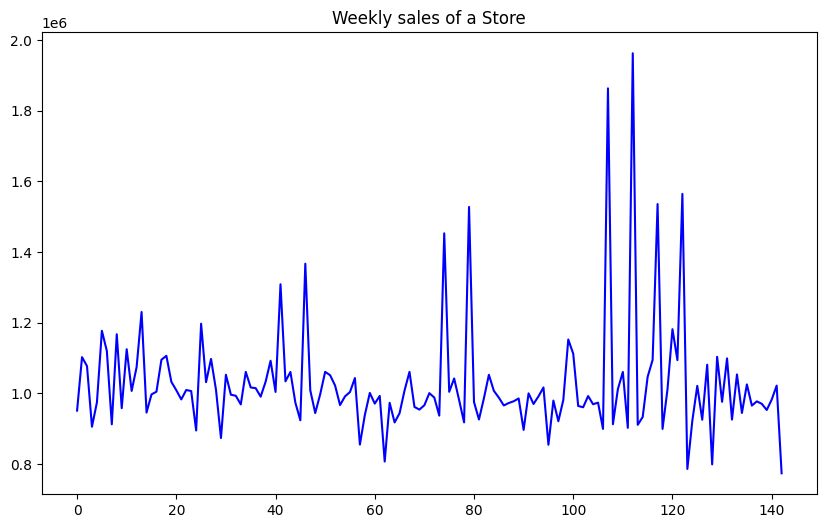

In [23]:
# Plotting weekly sales over time
sales.Weekly_Sales.plot(figsize= (10,6), title = 'Weekly sales of a Store', color='blue')
plt.show()

<Figure size 640x480 with 0 Axes>

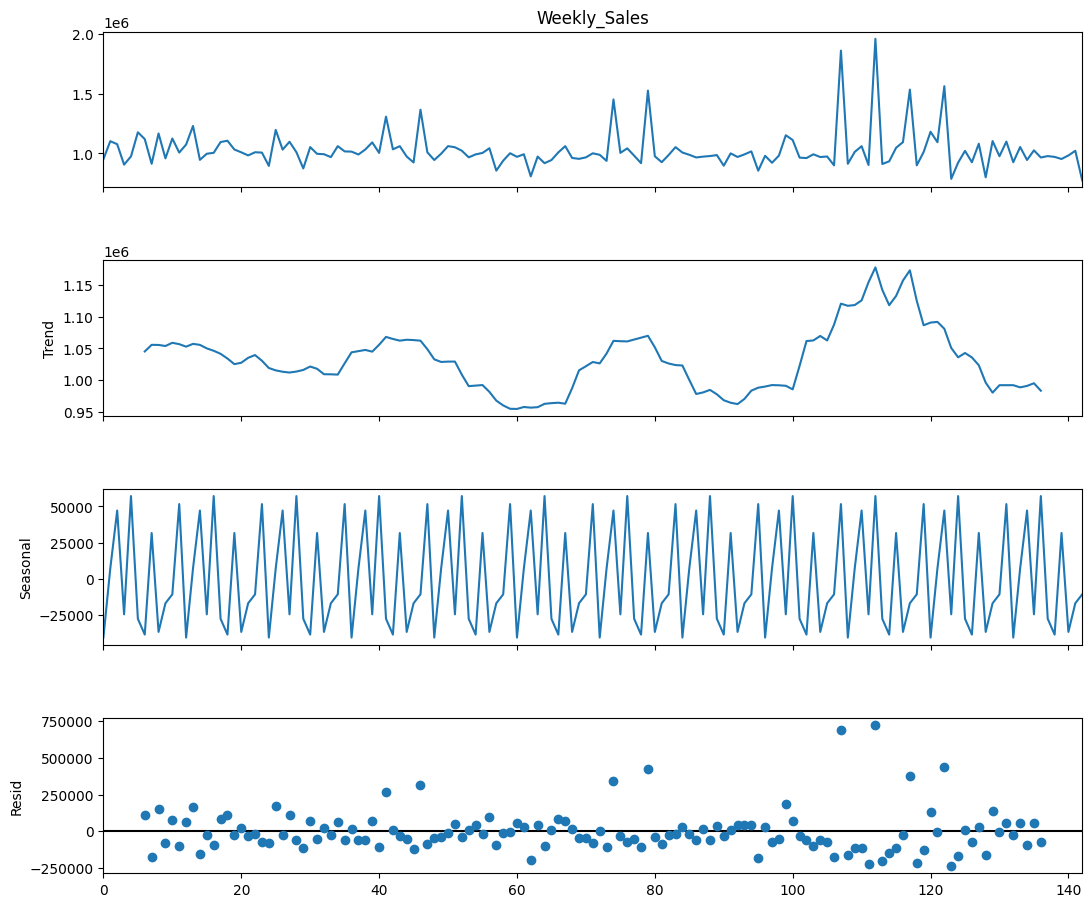

In [26]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 660.2+ KB


In [32]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [33]:
import seaborn as sns

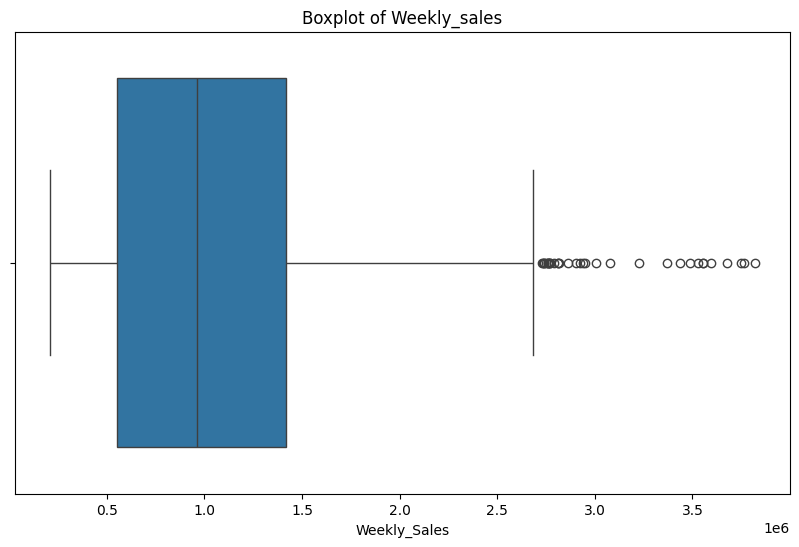

In [35]:
# Outlier analysis and Visualisation
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Weekly_Sales', data=data)
plt.title('Boxplot of Weekly_sales')
plt.show()

In [36]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#  are suffering the most?
correlation = data['Unemployment'].corr(data['Weekly_Sales'])

In [37]:
print(f"Correlation Between Weekly_Sales and Unemployment: { correlation}")

Correlation Between Weekly_Sales and Unemployment: -0.10617608965795429


In [64]:
## Store-wisw Analysis
store_wise = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].mean()

In [65]:
store_wise

Weekly_Sales  Unemployment
Store                            
1      1.555264e+06      7.610420
2      1.925751e+06      7.623846
3      4.027044e+05      7.176986
4      2.094713e+06      5.964692
5      3.180118e+05      6.295406
6      1.564728e+06      6.606902
7      5.706173e+05      8.585734
8      9.087495e+05      6.091846
9      5.439806e+05      6.099881
10     1.899425e+06      8.362965
11     1.356383e+06      7.176986
12     1.009002e+06     13.116483
13     2.003620e+06      7.001825
14     2.020978e+06      8.648748
15     6.233125e+05      7.996252
16     5.192477e+05      6.477993
17     8.935814e+05      6.549406
18     1.084718e+06      8.838301
19     1.444999e+06      7.996252
20     2.107677e+06      7.371413
21     7.560691e+05      7.623846
22     1.028501e+06      8.069371
23     1.389864e+06      4.796014
24     1.356755e+06      8.447014
25     7.067215e+05      7.371413
26     1.002912e+06      7.872070
27     1.775216e+06      8.001748
28     1.323522e+06     13.116483
29     5.394514e+05      9.806385
30     4.385796e+05      7.623846
31     1.395901e+06      7.623846
32     1.166568e+06      8.585734
33     2.598617e+05      8.533154
34     9.667816e+05      9.934804
35     9.197250e+05      8.788573
36     3.735120e+05      7.869049
37     5.189003e+05      7.869049
38     3.857317e+05     13.116483
39     1.450668e+06      7.869049
40     9.641280e+05      4.796014
41     1.268125e+06      6.973378
42     5.564039e+05      8.362965
43     6.333247e+05      9.934804
44     3.027489e+05      6.735622
45     7.859814e+05      8.648748

In [59]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [66]:
corr_store = data['Store'].corr(data['Weekly_Sales'])
corr_store

-0.33533201479281594

In [60]:
corr_temp = data['Temperature'].corr(data['Weekly_Sales'])
corr_temp

-0.06381001317946955

In [61]:
corr_cpi = data['CPI'].corr(data['Weekly_Sales'])
corr_cpi

-0.07263416204017632

In [62]:
corr_holiday = data['Holiday_Flag'].corr(data['Weekly_Sales'])
corr_holiday

0.03689096801041455

In [63]:
corr_unemployment = data['Unemployment'].corr(data['Weekly_Sales'])
corr_unemployment

-0.10617608965795429

In [67]:
corr_fuel = data['Fuel_Price'].corr(data['Weekly_Sales'])
corr_fuel

0.009463786314475114

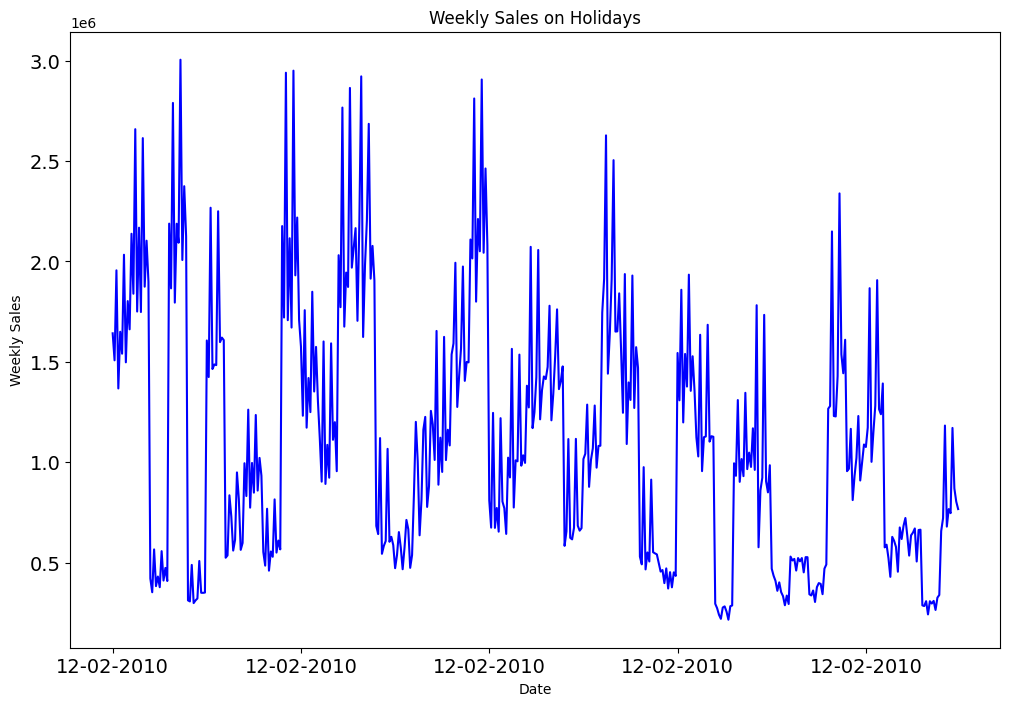

In [58]:
# impact of holidays on sales
holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales']
holiday_sales.plot(figsize= (12,8), title = 'Weekly Sales on Holidays', color='blue', fontsize = 14)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [68]:
# top performing store based on historical data
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

In [69]:
top_stores

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [70]:
worst_store =data.groupby('Store')['Weekly_Sales'].sum().idxmin()
worst_store

33

In [71]:
# difference between the sales
diff_sales = top_stores.max() - top_stores.min()
diff_sales

26015351.47999996

In [ ]:
# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12
#  weeks.

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [74]:
data.head(5)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90             0        42.31       2.572   
12-02-2010      1    1641957.44             1        38.51       2.548   
19-02-2010      1    1611968.17             0        39.93       2.514   
26-02-2010      1    1409727.59             0        46.63       2.561   
05-03-2010      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106  
19-02-2010  211.289143         8.106  
26-02-2010  211.319643         8.106  
05-03-2010  211.350143         8.106

In [75]:
data.index = pd.to_datetime(data.index)

<ipython-input-75-8132cf310084>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.index = pd.to_datetime(data.index)


In [76]:
data.sort_index(inplace =True)

In [77]:
train_size= int(len(data)* 0.8)

In [78]:
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [81]:
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))

In [82]:
# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [88]:
model = ARIMA(train['Weekly_Sales'], order=(4,4,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [89]:
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [90]:
pred = model_fit.predict(start= len(train), end= len(train) +len(test)-1, typ ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [92]:
mse = mean_squared_error(test['Weekly_Sales'], pred)

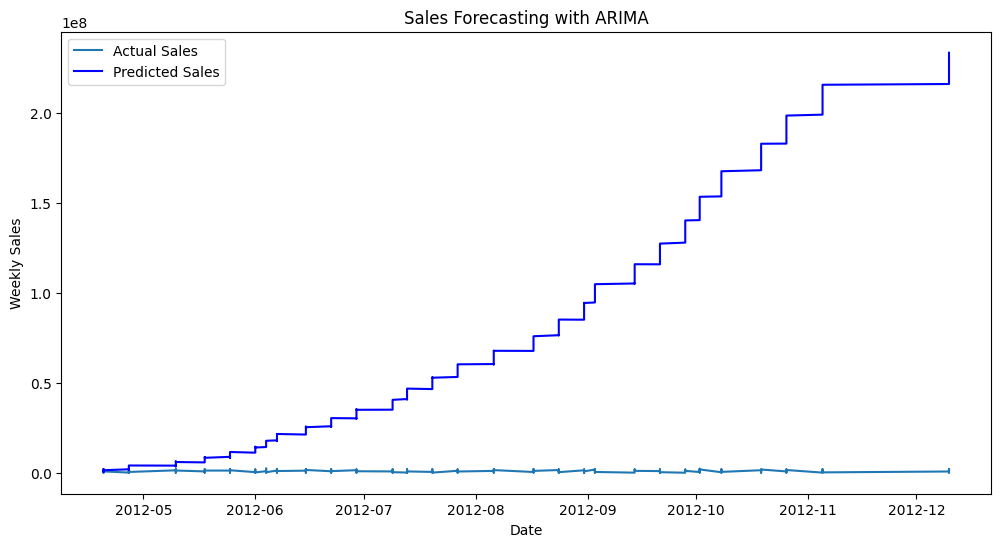

In [93]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Weekly_Sales'], label = 'Actual Sales')
plt.plot(test.index, pred, label = 'Predicted Sales', color ='blue')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()